<a href="https://colab.research.google.com/github/rlagksqls17/from_R_to_python/blob/main/%EA%B2%B0%EC%B8%A1%EC%B9%98%EC%99%80_%EC%9D%B4%EC%83%81%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결측치  

* 입력이 누락된 값을 의미  
* NA로 출력됨  
* 결측치 존재시 산술 연산 수행 어렵고, 분석 결과 왜곡 가능  
* 따라서 결측치 인식이 반드시 필요함  

## 결측치 인식  

### (R) is.na(x)  

* 데이터의 요소가 NA 값, 즉 결측치일 경우 TRUE를 반환하고 그렇지 않을 경우 FALSE를 반환해 줌   
* NA 존재시 결과값이 TRUE 인데, R은 TRUE를 1로 인식하기 때문에 연산을 통해 결측치의 개수를 확인 가능  
 

### (R) complete.cases(x)  

* 결측치를 가지고 있지 않은 완전한 데이터인지를 묻는 함수  
* 결측치가 없으면 TRUE가 반환됨  

Q1. R의 내장데이터 airquality는 6개의 변수를 가지고 있으며, 6개의 변수 중 2개의 변수는 결측치(na값)를 가지고 있다. is.na와 complete.cases 함수를 이용하여 다양한 방법으로 airquallity 데이터에서 결측치를 인식하는 연습을 수행해보자.  

```  
# is.na 함수 활용
> is.na(airquality$Ozone)  

# Ozone 변수에 존재하는 na의 개수 산출  
> sum(is.na(airquality$Ozone))

# Ozone 변수에서 na가 아닌 값과 na 값의 개수 비교  
# table() : 범주별 도수를 구해주는 함수  
# FaLSE : 해당 데이터가 na가 아닌 경우, TRUE : 해당 데이터가 na인 경우  
> table(is.na(airquality$Ozone))  
```  

Q2. apply 함수는 행 혹은 열별로 함수를 적용하여 한 번에 결과를 산출해주는 함수이다. apply 함수와 사용자 정의 함수를 활용하여 airquality 데이터의 모든 변수에 대해 각각 결측치가 몇 개씩 존재하는지 확인해보자.  

```  
# airqulity의 변수 별로 결측치의 개수를 구하는 사용자 정의 함수를 적용  
# sum(is.na(x)) : x 데이터에 존재하는 na값 개수의 합계를 구함  
> apply(airquality, 2, function(x) sum(is.na(x)))
```



In [3]:
# 파이썬으로 풀이해보자.  

# 먼저 데이터를 불러온다.  
import pandas as pd  
df1 = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/학습 자료/Sample data/airqual.csv")).drop(['Unnamed: 0'], axis = 1)

# 결측치를 확인한다.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


## 결측치 처리  

* 데이터에 결측치가 존재할 때 이 결측치를 대치하기 위한 방법은 아래와 같이 단순 대치법과 다중 대치법으로 분류된다.  

### 결측치 대치법

(단순 대치법)  
* completes analysis : 결측값이 존재하는 행을 삭제  
* 평균 대치법 : 관측 또는 실험을 통해 얻어진 데이터의 평균으로 결측치를 대치  
  - 비조건부 평균 대치법 : 관측 데이터의 평균값으로 대치  
  - 조건부 평균 대치법 : 회귀분석을 활용한 대치법  
* 단순확률 대치법 : 평균대치법에서 추정량 표준 오차의 과소 추정문제를 보환하고자 고안된 방법으로 Hot-deck 방법, nearest neighbor 방법 등이 있음  

(다중 대치법)  
* 단순 대치법을 여러번 수행하여 가상적 완전 자료를 만드는 방법 
* 대치 -> 분석 -> 결합 순으로 진행  


### 결측치 제거  

* 데이터에서 특정 행의 모든 변수값 중 결측치가 하나라도 존재하는 경우, 해당 행을 제거한 후 데이터 분석을 진행하고자 할 때 결측치 제거를 수행한다. is.na 함수 혹은 complete.cases 함수 적용 결과에 따라 결측치가 존재하는 행을 데이터에 제외시키는 방법으로 수행하거나 na.omit이라는 결측치 제거 함수를 사용할 수 있다.  

* na.omit은 인자로 지정한 데이터프레임에서 **결측치가 존재하는 행을 제외시켜주는 함수**이다. 결측치 제거 시 사용할 수 있는 방법은 아래와 같으며, 이 외에도 다른 패키지나 조건을 활용하여 다양한 방식으로 결측치 제거를 수행 가능하다.  

```  
# 결측치가 존재하는 행 제거  
데이터명[!is.na(데이터명),]  
데이터명[complete.cases(데이터명),]
데이터명 %>% filter(!is.na(데이터명))  

# na.omit 함수 활용
na.omit(데이터명)
```  

### 평균 대치법  

결측치가 존재할 경우, 해당 변수 값들의 평균으로 빈값을 대치할 수 있다. 아래 R 코드를 통해 그 방법을 익혀보자.  

Q1. R의 내장데이터 airquality의 Ozone 변수값이 존재하지 않는 경우, Ozone 변수 값들의 평균으로 대치해보자.  

```  
# 데이터에 NA가 존재할 경우 평균을 산출할 수 없다. 따라서 mean 함수 내부의 na.rm 인자 값을 T로 지정해야 하며, 이렇게 할 경우 NA 값을 제거하고 나머지 값들에 대한 평균을 산출한다.  
> airquality$Ozone<-ifelse(is.na(airquality$Ozone), mean(airquality$Ozone, na.rm = T), airquality$Ozone)
> table(is.na(airquality$Ozone))

FALSE 
  153 
``` 

In [17]:
# Ozone 변수 값의 평균을 구한다.  
Ozone_mean = df1['Ozone'].mean() # 42.13

df1['Ozone'] = df1['Ozone'].fillna(Ozone_mean)
print(df1.head())

      Ozone  Solar.R  Wind  Temp  Month  Day
0  41.00000    190.0   7.4    67      5    1
1  36.00000    118.0   8.0    72      5    2
2  12.00000    149.0  12.6    74      5    3
3  18.00000    313.0  11.5    62      5    4
4  42.12931      NaN  14.3    56      5    5


### 패키지 활용  

* DMwR 패키지를 주로 활용하나, 빅데이터 분석 기사에서 사용 가능한 패키지가 아니므로 생략하였다.  

## 이상치 인식  

* 이상치 : 관측된 데이터의 범위에서 많이 벗어나있는 아주 작거나 아주 큰 값으로서 정상범위 밖에 있는 값을 뜻한다. 이러한 이상치는 잘못 입력된 값일 수도 있으나 실제로 존재하는 값일 수도 있으며, 전체 데이터 분포에 큰 영향을 미친다.  

* 이상치가 존재할 경우 분석 결과가 특정한 쪽으로 치우치거나 왜곡될 수 있다. 따라서 데이터에서 이상치를 인식한 후, 이를 제외하고 분석을 할지 혹은 포함하거나 조정하여 분석을 할지 판단한 후 분석을 수행해야한다. 일반적으로 **이상치는 사분위수, 정규분포 등을 활용해 판별**한다. 

* 사분위수 : 데이터 표본을 가장 작은 값부터 가장 큰 값으로 정렬한 후, 4등분 했을 때 각 등위에 해당하는 값을 의미한다. 

* R에서 백분위수와 사분위수를 구하기 위해서는 quantile, summary, fivenum 등의 함수를 사용할 수 있다.  


### boxplot을 활용한 이상치 판별  

Q1. 내장데이터 airquality의 Ozone 변수에 대한 boxplot을 그려보자. 또한 이를 OzoneBP라는 변수에 저장하여 lower whisker와 upper whisker 밖에 있는 이상치가 존재하는지를 확인해보자.  

```  
boxplot(airquality$Ozone)
```  

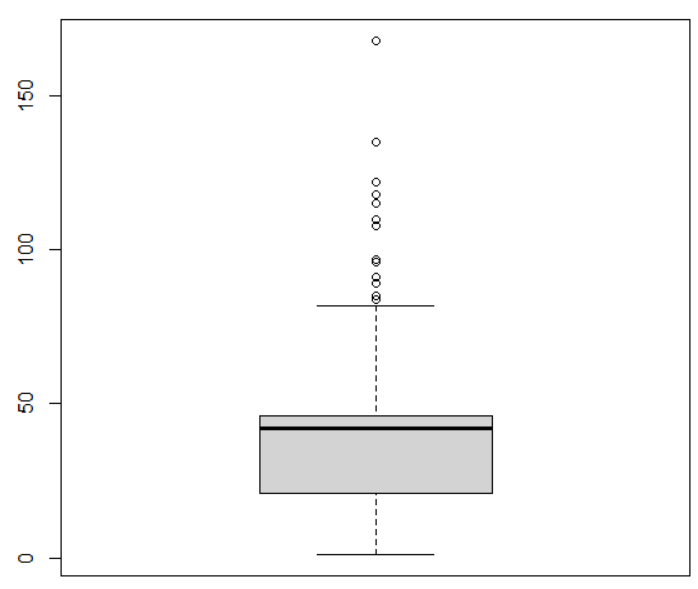



```  
#boxplot의 반환값 확인  
> OzoneBP<-boxplot(airquality$Ozone)  
> OzoneBP$out
 [1] 115 135  97  97  85 108 122  89 110 168 118  84  85  96  91

```

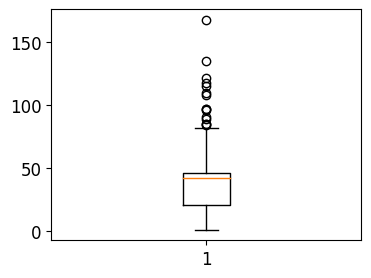

115.0
135.0
97.0
97.0
85.0
108.0
122.0
89.0
110.0
168.0
118.0
84.0
85.0
96.0
91.0


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
148   NaN
149   NaN
150   NaN
151   NaN
152   NaN
Name: Ozone, Length: 153, dtype: float64

In [30]:
# 파이썬  
import matplotlib.pyplot as plt  
import numpy as np  

# 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 데이터 준비  
data = df1['Ozone']

# 그래프 그리기
fig,ax = plt.subplots()
ax.boxplot([data])
plt.show()

# 사분위수 확인
Q1 = data.quantile(.25)
Q3 = data.quantile(.75)
IQR = Q3 - Q1  

def func(x):
    if x >= (Q3 + 1.5 * IQR):
        print(x)
        return x # 이상치들을 반환 

df1['Ozone'].apply(lambda x: func(x)) 

## 인용 및 참고문헌 

"윤종식", "ADP 실기 데이터 분석 전문가" 2판, 데이터 에듀, 2021